# Exercise 2

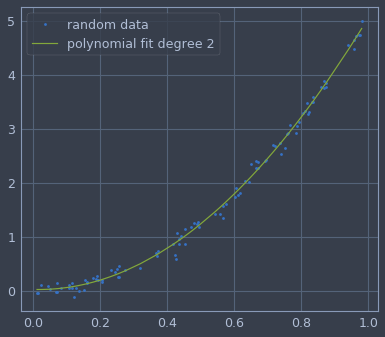

Mean squared error: 0.01
R2 score: 1.00
Mean absolute error: 0.08


In [20]:
# Exercise 2.1: Own code for making polynomial fit
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

def plot_regression(x, y, x_fit, y_fit, y_label='model fit'):
    '''Plot data and model fit in one figure.'''
    plt.figure()
    plt.plot(x, y, '.', label='random data')
    plt.plot(x[idx_sorted], y_tilde[idx_sorted], '-', label=y_label)
    plt.legend()
    plt.show()
    
def print_error_analysis(y, y_tilde):
    '''Print error analysis of regression fit using scikit.'''
    print("Mean squared error: %.2f" % mean_squared_error(y, y_tilde))
    print('R2 score: %.2f' % r2_score(y, y_tilde))
    print('Mean absolute error: %.2f' % mean_absolute_error(y, y_tilde))

N = 100 # data size
p = 2   # polynomial degree

# Random data
x = np.random.rand(N, 1)
y = 5*x*x + 0.1*np.random.randn(N, 1)

# Creating design matrix X
X = np.ones((N, p + 1))
for i in range(1, p + 1):
    X[:,i] = x[:,0]**i
    
# Matrix inversion
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
# Creating model
y_tilde = X @ beta

# Sorting arrays for plotting
idx_sorted = np.argsort(x[:,0])

plot_regression(x, y, 
                x[idx_sorted], y_tilde[idx_sorted], 
                y_label='polynomial fit degree 2')

print_error_analysis(y, y_tilde)

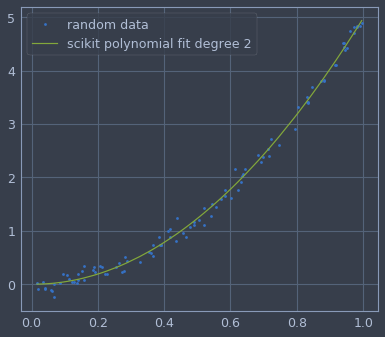

Mean squared error: 0.01
R2 score: 1.00
Mean absolute error: 0.09


In [19]:
# Exercise 2.2: Using scikit-learn to make polynomial fit

clf = skl.LinearRegression().fit(X, y)
y_tilde_scikit = clf.predict(X)

# Plotting model and data
plot_regression(x, y, 
                x[idx_sorted], y_tilde_scikit[idx_sorted], 
                y_label='scikit polynomial fit degree 2')

# Exercise 2.3: Error analysis.
print_error_analysis(y, y_tilde_scikit)

# Exercise 4

Continuation of exercise 2. Writing code for Ridge and Lasso regression.

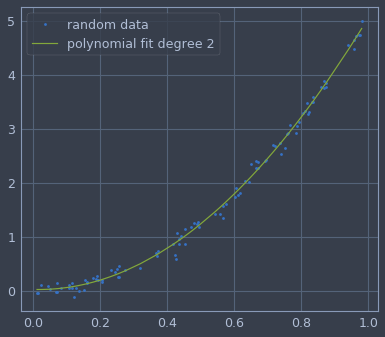

Mean squared error: 0.01
R2 score: 0.99
Mean absolute error: 0.09


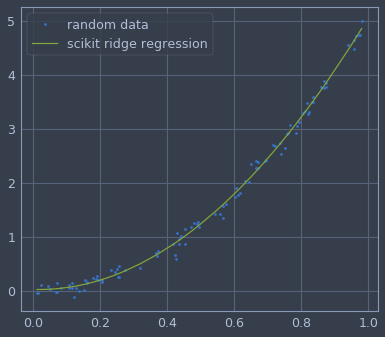

Mean squared error: 0.01
R2 score: 0.99
Mean absolute error: 0.09


In [31]:
# Exercise 4.1: Own code for ridge regression.
_lambda = 0.1

beta_ridge = np.linalg.inv(X.T.dot(X) + _lambda*np.identity(p+1)).dot(X.T).dot(y)
y_ridge = X @ beta_ridge

plot_regression(x, y, 
                x[idx_sorted], y_ridge[idx_sorted], 
                y_label='polynomial fit degree 2')

print_error_analysis(y, y_ridge)

# Exercise 4.2: Scikit version of ridge regression.
clf_ridge = skl.Ridge(alpha=_lambda).fit(X, y)
y_ridge_scikit = clf_ridge.predict(X)

plot_regression(x, y, 
                x[idx_sorted], y_ridge_scikit[idx_sorted], 
                y_label='scikit ridge regression')

print_error_analysis(y, y_ridge_scikit)

In [ ]:
# Exercise 4.3: Analyze parameters beta
